# Introduction

Ever since the start of world war when the USSR launched the first ever manmade sattelite into the space called the Sputnik, the world has taken great interests in trying to explore beyond the planet. Rocket science, Cosmology, Astronomy are the epitome of engineering and science that require extreme levels of theoretical as well as experimental work.

A lot of mathematics goes behind when and where should a space launch take place for reaching it's destination at least possible resistance and with highest probability of success. At the same time, extreme levels of engineering is done to simulate the similar space conditions back on earth and test the launch vehicles for any possible failures. All these space missions require years of hard work, research and tests for success. 

It provides immense national pride when launches are successful. However, it is also incredibly disheartening when the missions don't succeed and millions of dollars and national dreams burst into flames. However, as peculiar as science is, no experiment is ever famous without it's fair share of failures.

I would love to thank the dataset contributor who has taken the effort to provide us with a great dataset that can help us analyse the various successes and failures of the space organisations world wide.

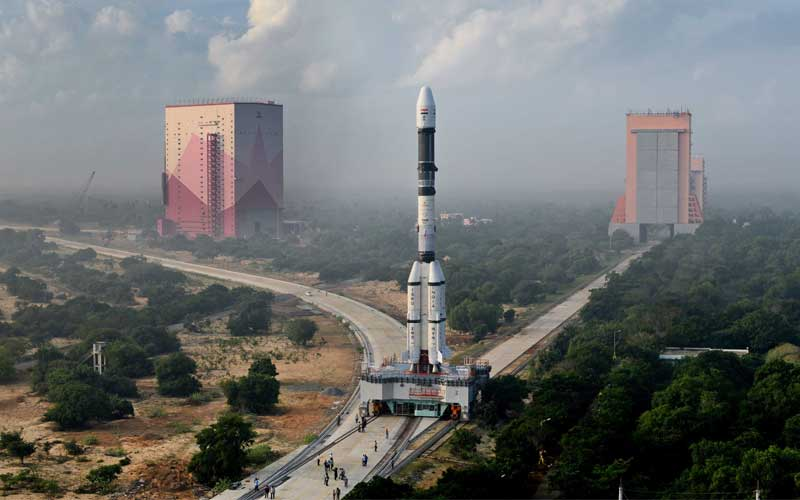

# Importing the relevant libraries and dataset

Let us start off with the usual step of importing all the required libraries and the dataset.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode (connected = True)

In [ ]:
df=pd.read_csv('../input/all-space-missions-from-1957/Space_Corrected.csv',index_col=0)
df.drop('Unnamed: 0.1',axis=1,inplace=True)
df.head()

## Data description

Let us quickly try to understand each of the columns and what they mean.

* **Company name** : The space organisation undertaking the mission

* **Location** : The point of spacecraft launch on earth

* **Datum** : Date and time of liftoff 

* **Detail** : Name and type of the spaceship

* **Status of rocket** : Whether the space craft is still under commission and active in it's mission

* **Rocket** : Cost of the mission in million $ 

* **Status Mission** : Whether the mission was successful


# Data Wrangling

Let us check for presence of missing values and other issues with the data if any.


In [ ]:
df.isna().any()

From the above, we see that only one particular column has null values. This is in the column of mission cost. It could be that not all organisations are comfortable with disclosing the mission cost. Let's see how many mission costs are accounted for.

In [ ]:
df[' Rocket'].isna().value_counts()

As we can see, majority of the space missions have not disclosed the cost of their mission. However, we will try to understand as much as possible from the data available to us already.

Let us check if all the data types are correct.

In [ ]:
df.dtypes

We see that all the columns are objects when in fact, the Datum column should've been datetime and the Rocket column should've been integer. Let us solve these issues.

In [ ]:
df['Launch date']=pd.to_datetime(df['Datum'])
df['Launch date']=df['Launch date'].astype(str)

In [ ]:
df['Launch date']=df['Launch date'].str.split(' ',expand=True)[0]
df['Launch date']=pd.to_datetime(df['Launch date'])

In [ ]:
df[' Rocket']=df[' Rocket'].str.replace(',','')
df[' Rocket']=df[' Rocket'].astype(float)

In [ ]:
df['Status Rocket']=df['Status Rocket'].str.replace('Status','')

In [ ]:
df.drop('Datum',axis=1,inplace=True)
df.head()

Now, we have a clean dataset and can proceed for data visualisation.

# Data Visualisation

Let us start off with the data visualisation. First off, let's check the number of successful and non successful missions.

### Mission status

In [ ]:
df['Count']=1
df_status=df.groupby('Status Mission')['Count'].sum().reset_index()

fig=px.pie(df_status,values='Count',names='Status Mission',hole=0.4)

fig.update_layout(title='Mission status',title_x=0.5,
                  annotations=[dict(text='Status',font_size=15, showarrow=False,height=800,width=900)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

From the above pie chart, we see that about 89.7 % launch missions are successful followed by 7.84 % failures.

### Rocket status

Let us check how many rockets are currently active.

In [ ]:
sns.catplot('Status Rocket',kind='count',data=df,aspect=2,height=5,palette='viridis')
plt.title('Current status of rockets',size=25)
plt.xlabel('Rocket status',size=15)


As we can see, about 800 rockets are still active while a majority of them have retired after completion of their mission.

### Company name

Let us see which are the top 20 companies that have been leading space race.

In [ ]:
df_comps=df.groupby('Company Name')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_comps=df_comps.head(20)
sns.catplot('Company Name','Count',data=df_comps,palette='coolwarm',kind='bar',aspect=2,height=8)
plt.title('Top 20 space companies',size=25)
plt.xticks(rotation=80,size=15)
plt.xlabel('Company name',size=20)
plt.yticks(size=15)

As we can see, RVSN USSR leads the way by a massive margin of above 1750 missions. This is not possible considering the fact that USSR has now dissolved for more than 2 decades and it takes immense money to perform even a single mission. 

It could be explained by the fact that RVSN USSR used to perform Interconinental Ballistic Missile (ICBMs) tests as well. This might be the reason for such an inflated number.


### Countries leading the space race

Let us try to find which countries are leading the space quest.

In [ ]:
df['Country']=df['Location'].str.split(', ').str[-1]

In [ ]:
df_countries=df.groupby('Country')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_countries=df_countries.head(10)

In [ ]:
sns.catplot('Country','Count',data=df_countries,aspect=2,height=8,kind='bar',palette='winter')

plt.title('Top 10 nations leading the space launches',size=25)
plt.xticks(size=15,rotation=45)
plt.xlabel('Country',size=15)
plt.ylabel('Count',size=15)
plt.yticks(size=15)

As we can see, Russia is leading the space race followed by USA closely in the number of space launches within the country. It is also to be noted that the majority of the space launches in Kazakhstan also are undertaken by Roscosmos, Russia.

### Mission cost

Let us first see how the various mission costs of the available data are distributed.

In [ ]:
df_cost=df.dropna()
plt.figure(figsize=(10,8))
sns.distplot(df_cost[' Rocket'],color='green')
plt.title('Mission cost in million $',size=25)
plt.xlabel('Cost of mission (million $)',size=15)

Let us check which companies have spent the most in their space missions so far.

In [ ]:
df_cost_comp=df_cost.groupby('Company Name')[' Rocket'].sum().reset_index().sort_values(by=' Rocket',ascending=False)

df_cost_comp[' Rocket']=df_cost_comp[' Rocket']/1000 #Converting costs to billion $

In [ ]:

sns.catplot('Company Name',' Rocket',data=df_cost_comp,aspect=2,height=8,kind='point')
plt.xticks(size=15,rotation=45)
plt.xlabel('Company name',size=20)
plt.ylabel('Money spent (in billion $)',size=20)
plt.yticks(size=15)
plt.title('Money spent on space missions',size=25)

As we can see, NASA has led the money spent on space missions by a long shot with around 75 billion dollars spent so far followed by Arianespace with 15 billion dollars.

### Number of missions since the inception of the first successful mission

Here, we are gonna check the number of space missions in each year

In [ ]:
df['Year']=df['Launch date'].dt.year

In [ ]:
df_year=df.groupby('Year')['Count'].sum().reset_index()

fig=px.line(df_year,y='Count',x='Year',height=800,width=1000)
fig.update_layout(title='Number of missions each year',font_size=20,title_x=0.5)
fig.show()

As we can see, in the recent decade of 2010-2019, the space race has picked up again after a dip since 1977. Due to the **pandemic and the global recession**, it is expected that there will be a dip in the number of space missions in 2020.

Infact, let us check who have launched in 2020 so far.

In [ ]:
df_latest=df[df['Year']==2020]

In [ ]:
sns.catplot('Company Name',data=df_latest,kind='count',aspect=2,height=8)
plt.yticks(np.arange(20))
plt.title('2020 launches',size=25)
plt.xlabel('Company name',size=20)
plt.xticks(size=15,rotation=45)
plt.yticks(size=15)
plt.ylabel('Number of missions',size=15)

As we can see, CASC which is the space organisation of China has conducted the highest number of space missions  followed closely by SpaceX of USA.


### Success rate of the famous Mars Club

Let us check the mission success rate of the famous mars club. So far, only 4 nations have made it to mars and only 2 have landed. The USSR was the first country to land the Mars 3 lander but sadly, after soft landing, contact was lost after 15 seconds. NASA made history by landing their curiosity rover and have launched another mission called the perserverance in 2020 which is expected to land on the Jezero crater of Mars on 18th Feb, 2021.

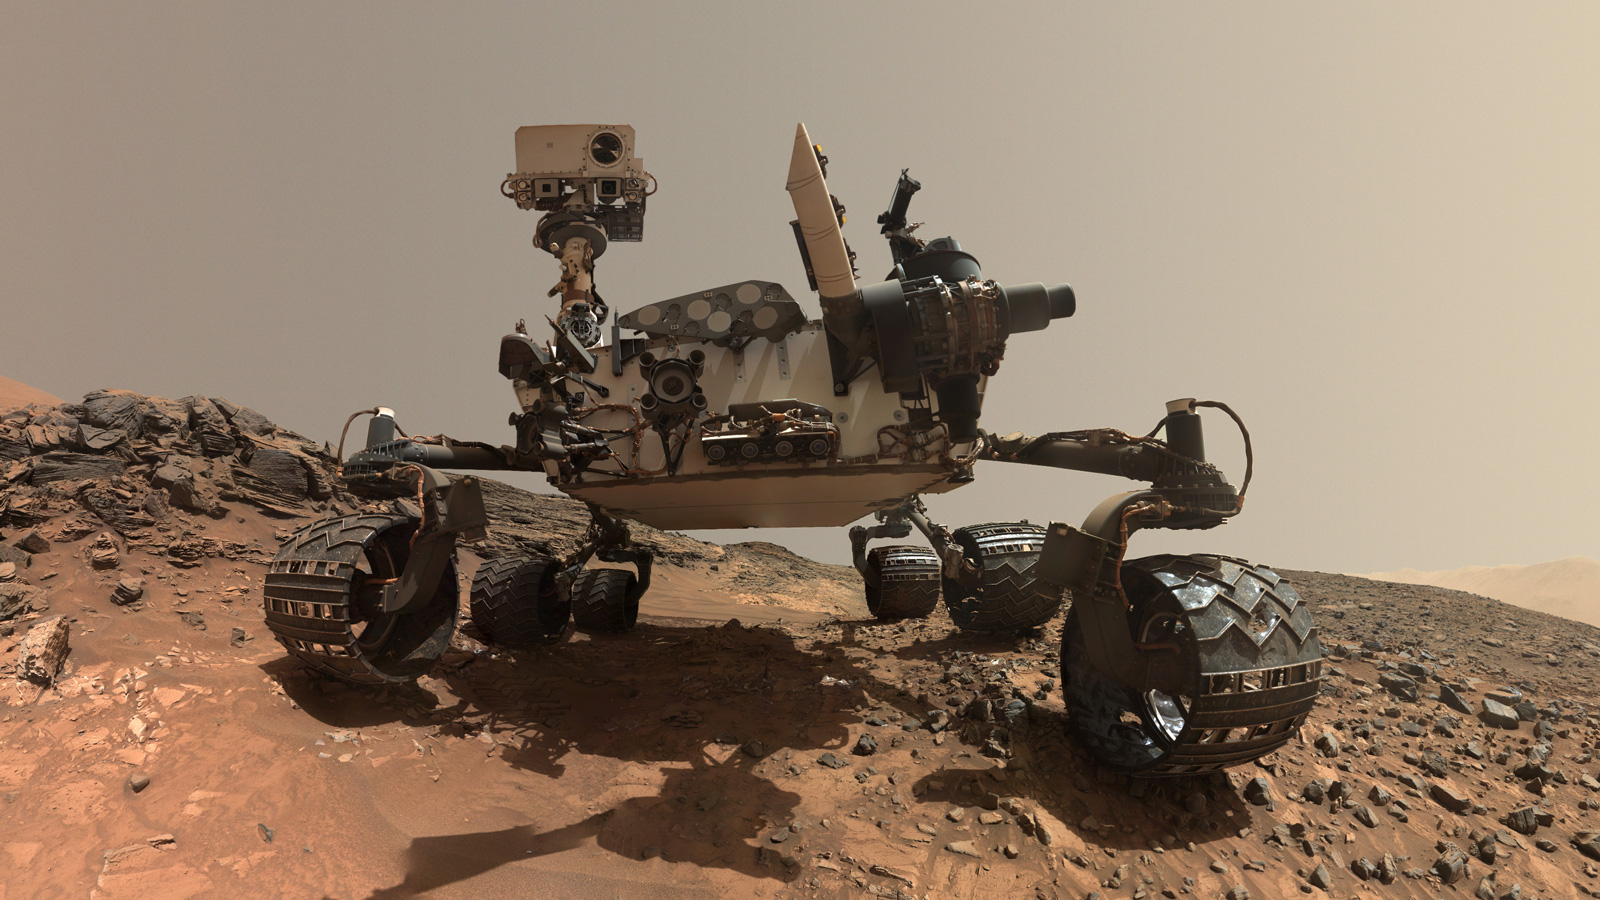


The Mars club consists of the following organisations:

* NASA (USA)
* Roscosmos (Russia)
* ESA (European union)
* ISRO (India)

It is also important to note that as we speak, the UAE, China and USA have their space crafts enroute to the Mars ORBIT. Let us all hope that these missions are a success and help the human kind learn more of our planetary neighbors.

In [ ]:
df_nasa=df[df['Company Name']=='NASA']
df_isro=df[df['Company Name']=='ISRO']
df_esa=df[df['Company Name']=='ESA']
df_rosc=df[df['Company Name']=='Roscosmos']

In [ ]:
fig1=plt.figure(figsize=(10,15))
ax1=fig1.add_subplot(221)
sns.countplot('Status Mission',data=df_nasa,ax=ax1)
ax1.set_title('NASA success rate = {0:.2f}%'.format(100*df_nasa['Status Mission'].value_counts()[0]/df_nasa.shape[0]),size=15)

ax2=fig1.add_subplot(222)
sns.countplot('Status Mission',data=df_rosc,ax=ax2,palette='summer')
ax2.set_title('Roscosmos success rate = {0:.2f}%'.format(100*df_rosc['Status Mission'].value_counts()[0]/df_rosc.shape[0]),size=15)


ax3=fig1.add_subplot(223)
sns.countplot('Status Mission',data=df_esa,ax=ax3,palette='winter')
ax3.set_title('ESA success rate = {0:.2f}%'.format(100*df_esa['Status Mission'].value_counts()[0]/df_esa.shape[0]),size=15)


ax4=fig1.add_subplot(224)
sns.countplot('Status Mission',data=df_isro,ax=ax4,palette='coolwarm')
ax4.set_title('ISRO success rate = {0:.2f}%'.format(100*df_rosc['Status Mission'].value_counts()[0]/df_isro.shape[0]),size=15)



From the above plots, we see that Roscosmos has the highest success rate. However, number of missions undertaken by NASA are far higher and the success rate is nearly identical as Roscosmos. Hence, NASA fairs far better than the other companies in the success rate of mission.


### Choropleth of the countries involved in the great space race

In [ ]:
map_data = [go.Choropleth( 
           locations = df_countries['Country'],
           locationmode = 'country names',
           z = df_countries["Count"], 
           text = df_countries['Country'],
           colorbar = {'title':'No. of Launches'},
           colorscale='temps')]

layout = dict(title = 'Missions per country', title_x=0.5,
             geo = dict(showframe = False, 
                       projection = dict(type = 'equirectangular')))

world_map = go.Figure(data=map_data, layout=layout)
iplot(world_map)

# If you found this notebook helpful, an upvote would be great ! :)